<a href="https://colab.research.google.com/github/tiravata/2014-slides/blob/master/24_example_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="45px" src="https://avatars3.githubusercontent.com/u/20337240?s=460&v=4" align="left" hspace="10px" vspace="0px">

<h1>รวมตัวอย่าง Machine learning และ Deep learning</h1>

<hr>

<a href='https://www.facebook.com/programmerthai'><font color='green'>สรุปและเรียบเรียงโดย โปรแกรมเมอร์ไทย thai programmer</font></a>



# วิธีใช้งาน colab

Colab พัฒนาโดย google เป็นหน้าเว็บเอาไว้ใช้เขียนโค้ด python ได้ผ่านทางหน้าเว็บ และเชื่อมต่อกับ google drive ของเราก็ได้ด้วย ซึ่ง colab หน้านี้**ได้รวบรวมเนื้อหา Python ของม.ต้น** เอาไว้ แต่ก่อนอื่นอยากให้ดูวิธีการใช้งาน colab เสียก่อน

<font color='red'>** ต้องมี Gmail และ google drive</font>

<hr/>

<h3>วิธี 1) กด "Open in playgrouhd"</h3>
<div>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2020/05/python_matayom_4.png" align="center" hspace="10px" vspace="0px">


<hr/>

<h3>วิธี 2) กด Save a copy in Drive ... เพื่อบันทึกไว้ google drive เครื่องเรา</h3>

<img height="300px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_1.png" align="center" hspace="10px" vspace="0px">

<br/>

<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_2.png" align="center" hspace="10px" vspace="0px">

<hr/>

<h3>จากนั้นถึงจะสามารถรันได้</h3>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_3.png" align="center" hspace="10px" vspace="0px">

# import โมดูลสำคัญๆ

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.recurrent import SimpleRNN, LSTM, GRU 
from keras.models import Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D

Using TensorFlow backend.


# Datasets

ฟังก์ชั่นดาวนโหลด datasets ได้แก่ cifar10, cifar100, imdb, reuters, mnist, fashion_mnist และ boston_housing

In [ ]:
def get_datasets(param='mnist'):
  x_train = None; y_train = None; x_test = None; y_test = None
  if param == 'cifar10':
    from keras.datasets import cifar10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

  elif param == 'cifar100':
    from keras.datasets import cifar100
    (x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

  elif param == 'imdb':
    from keras.datasets import imdb
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)
  elif param == 'reuters':
    from keras.datasets import reuters
    (x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
    # Optional
    word_index = reuters.get_word_index(path="reuters_word_index.json")

  elif param == 'mnist':
    from keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

  elif param == 'fashion_mnist':
    from keras.datasets import fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

  elif param == 'boston_housing':
    from keras.datasets import boston_housing
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    
  return x_train, y_train, x_test, y_test


In [ ]:
"""
from sklearn.model_selection import train_test_split

def get_datasets():
	digits = datasets.load_digits()
	x = digits.data
	y = digits.target	
	x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                        test_size=0.33,
                                                        random_state=42)
	return x_train, x_test, y_train, y_test	
"""

'\nfrom sklearn.model_selection import train_test_split\n\ndef get_datasets():\n\tdigits = datasets.load_digits()\n\tx = digits.data\n\ty = digits.target\t\n\tx_train, x_test, y_train, y_test = train_test_split(x, y,\n                                                        test_size=0.33,\n                                                        random_state=42)\n\treturn x_train, x_test, y_train, y_test\t\n'

# Model

## Model 1: Nearest neighbors	

โมเดลแบบที่ 1

---

In [ ]:
def train_nearest_neighbors(Xtrain, Ytrain, Xtest, Yexpected):  
	count = 0
	numSample,_   = Xtest.shape
	# compute distance with Manhattan formula	
	Ypredicted = np.zeros(numSample)	
	for index in range(0,numSample):
		# minus with broadcasting in numpy
		ditanceList = np.sum(np.abs(Xtrain - Xtest[index]), axis=1)		
		# min distance at first of list	and get Index
		minDistanceIndex = np.argsort(ditanceList)[0] 
		Ypredicted[index] = Ytrain[minDistanceIndex]
    
		count = count+1
		if count % 100 == 0:
		    print("progress %d %%" % (count/numSample*100))
      
	# Calculate accuracy (True in python is 1, and False is 0
	accuracy = np.sum(Yexpected == Ypredicted)/ len(Yexpected) * 100
	print("Accuracy: %.4f" % accuracy)
	print("Classification report")
	print(metrics.classification_report(Yexpected, Ypredicted))

## Model 2: Support vector

โมเดลแบบที่ 2


---


In [ ]:
from sklearn import datasets, svm, metrics

def train_support_vector(Xtrain, Ytrain, Xtest, Yexpected):
	# a support vector classifier
	classifier = svm.SVC(gamma=0.001)
	# learning
	classifier.fit(Xtrain, Ytrain)
	# predict
	Ypredicted = classifier.predict(Xtest)
	
	# Calculate accuracy (True in python is 1, and False is 0
	accuracy = np.sum(Yexpected == Ypredicted)/ len(Yexpected) * 100
	print("Accuracy: %.4f" % accuracy)
	print("Classification report")
	print(metrics.classification_report(Yexpected, Ypredicted))

## Model 3: Logistic regression (1 neural)
โมเดลแบบที่ 3


---


In [ ]:
def build_logistic_regression(features):
	model = Sequential()		
	# L2 is weight regularization penalty, also known as weight decay, or Ridge
	model.add(Dense(input_dim=features, output_dim=10, W_regularizer=l2(0.20))) 
	# now model.output_shape == (None, 10)
	# note: `None` is the batch dimension.	
	#
	model.add(Activation("softmax"))
		
	# algorithim to train models use RMSprop
	# compute loss with function: categorical crossentropy
	model.compile(optimizer='rmsprop',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])
	return model

## Model 4: Neural network (Multilayer Perceptron: MLP)

โมเดลแบบที่ 4


---



In [ ]:
def build_MLP(features):		
	model = Sequential()
	model.add(Dense(input_dim=features, units=200, activation="relu"))	
	model.add(Dense(input_dim=features, units=200, activation="relu"))	
	model.add(Dropout(rate = 1-0.6))	# reduce overfitting
	model.add(Dense(units=10, activation="softmax"))		
		
	# algorithim to train models use RMSprop
	# compute loss with function: categorical crossentropy
	model.compile(optimizer='rmsprop',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])	
	return model


## Model 5: Convolutional Neural Networks (CNN) with Conv2D

โมเดลแบบที่ 5


---


In [ ]:
import math
def reshapeCNN2D_Input(X): 
	exampleNum, D = X.shape	
	W = int(math.sqrt(D))	
	#assert W == 8 # size of image == 8 x 8
	
	# change shape of image data	 			
	if K.image_dim_ordering() == 'th': 
		# backend is Theano
		# Image dimension = chanel x row x column (chanel = 1, if it is RGB: chanel = 3)
		XImg = X.reshape(exampleNum, 1, W, W)			
	else: 
		# 'tf' backend is Tensorflow
		# Image dimension = row x column x chanel (chanel = 1, if it is RGB: chanel = 3)
		XImg = X.reshape(exampleNum, W, W, 1)				
		
	return XImg

In [ ]:
def build_CNN_2D(image_shape):	
	model = Sequential()	
	model.add(Conv2D(filters=100, kernel_size=(3, 3), padding='same', input_shape=image_shape))
	model.add(Conv2D(filters=100, kernel_size=(3, 3), padding='same'))	
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2,2)))	
	model.add(Dropout(0.5))		
	model.add(Flatten())		
	model.add(Dense(10))
	model.add(Activation('softmax')) 
	
	# algorithim to train models use ADAdelta
	# compute loss with function: categorical crossentropy
	model.compile(optimizer='adadelta',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])
	return model

## Model 6: Convolutional Neural Networks (CNN) with Convolution1D

โมเดลแบบที่ 6


---


In [ ]:
def reshapeCNN1D_Input(X): 
	exampleNum, D = X.shape	
	W = int(math.sqrt(D))	
	#assert W == 8 # size of image == 8 x 8	
	return X.reshape(exampleNum, W, W)	

In [ ]:
def build_CNN_1D(image_shape):	 
	model = Sequential()	
	model.add(Conv1D(filters=100, kernel_size= 3, padding='same', input_shape=image_shape))
	model.add(Conv1D(filters=100, kernel_size=3, padding='same'))
	model.add(Activation('relu'))
	model.add(MaxPooling1D(pool_size=2))	
	model.add(Dropout(0.5))		
	model.add(Flatten())	
	model.add(Dense(10))
	model.add(Activation('softmax')) 
	
	# algorithim to train models use ADAdelta
	# compute loss with function: categorical crossentropy
	model.compile(optimizer='adadelta',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])
	return model

## Model 7: Recurrent Neural Network (RNN)

โมเดลแบบที่ 7


---



In [ ]:
def getSequenceInput(X): 
	exampleNum, D = X.shape	
	W = int(math.sqrt(D))	
	#assert W == 8 # size of image == 8 x 8
	
	# Dimension = row x colum (without chanel)
	XImg = X.reshape(exampleNum, W, W)
	return XImg

In [ ]:
def build_RNN(image_shape):			
	sequence, features = image_shape
	model = Sequential()
	model.add(SimpleRNN(input_shape=(sequence, features),				
					units=100, dropout=0.2, recurrent_dropout=0.2, 	return_sequences=True))
	model.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
	model.add(Dense(10))
	model.add(Activation("softmax"))
		
	# algorithim to train models use RMSProp
	# compute loss with function: categorical crossentropy
	model.compile(optimizer='rmsprop',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])	
	return model

## Model 8: Long short-term memory (LSTM)

โมเดลแบบที่ 8


---


In [ ]:
def build_LSTM(image_shape):		
	sequence, features = image_shape
	model = Sequential()	
	model.add(LSTM(	input_shape=(sequence, features),				
					units=100, dropout=0.2, recurrent_dropout=0.2, 	return_sequences=True))
	model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))
	model.add(Dense(10))
	model.add(Activation("softmax")) #outputs are independent 
		
	# algorithim to train models use RMSProp
	# compute loss with function: categorical crossentropy
	model.compile(optimizer='rmsprop',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])	
	return model

## Model 9: Gated Recurrent Unit (GRU)

โมเดลแบบที่ 9


---




In [ ]:
def build_GRU(image_shape):			
	sequence, features = image_shape
	model = Sequential()	
	model.add(GRU(	input_shape=(sequence, features),				
					units=100, dropout=0.2, recurrent_dropout=0.2, 	return_sequences=True))	
	model.add(GRU(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=False))	
	model.add(Dense(10))	
	model.add(Activation("softmax")) #outputs are independent 
		
	# algorithim to train models use RMSProp
	# compute loss with function: categorical crossentropy
	model.compile(optimizer='rmsprop',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])	
	return model

# Visualize loss function and accuracy

copy code from

https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        #self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
        
    def on_epoch_end(self, epoch, logs={}):
        print("epoch: %d " % epoch)     
                
        self.logs.append(logs)
        #self.x.append(self.i)
        self.x.append(epoch)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        #self.i += 1
        
        
        if epoch%10 !=0 or epoch==0:
          return # skip plot graph
        
        f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()


# Utility function

In [ ]:
def restoreImg(X):
	_, D = X.shape	
	W = int(math.sqrt(D))	
	assert D == W * W	
	X_image = X.reshape((-1, W, W))
	return X_image	

In [ ]:
def decode(Ydigits):
	# np.argmax: Returns the indices of the maximum values along an axis.	
	return np.array( [ np.argmax(list) for list in Ydigits] )

def get_prob(Y_predict): 
  Y_predict=np.array(Y_predict)
  return  np.array( [ np.max(list) for list in Y_predict] )

In [ ]:
def plotExampleImg(title, X_image, Ydigits, Y_predict=None):
	fig, axarr = plt.subplots(2, 5)
	axList = np.reshape(axarr, (2*5,))
	plt.gcf().canvas.set_window_title(title)
	fig.set_facecolor('#FFFFFF')
	assert X_image.shape[0] == Ydigits.shape[0]
		
	for num in range(0,10):	 # label 0 to 9
		selectIndex = np.where(Ydigits == num)[0] # select all indexs followed the label number
		digitsImg = X_image[selectIndex]		
		# random images
		#Return random integers from 0 (inclusive) to high (exclusive).		
		if len(digitsImg)==0:
			print("++picture of %s is not found+++" % num)
			continue
		randomIndex = np.random.randint(0, digitsImg.shape[0])		
		#axList[num].imshow(digitsImg[randomIndex], cmap=plt.cm.gray)	
		plt.gray()
		axList[num].set_axis_off() # turn off axis x, y
		axList[num].imshow(digitsImg[randomIndex])	
		if Y_predict is not None:
			assert Ydigits.shape[0] == Y_predict.shape[0]
			ySelect = Y_predict[selectIndex]
			axList[num].set_title("%s=> %.2f%%" % (num, ySelect[randomIndex]*100))		
		else:			
			axList[num].set_title("Number %s" % num)
		
	plt.tight_layout()
	plt.show()

In [ ]:
from sklearn import metrics

def testModel(model, X_image, Xtest, Yexpected,  title_graph=""):
	Ypredicted 			= model.predict(Xtest, verbose=0)
	#Yexpected 			= decode(Yexpected) 	# convert binary to digits 0-9
	Ypredicted_decode 	= decode(Ypredicted) # convert binary to digits 0-9
	print("Classification report")
	print(metrics.classification_report(Yexpected, Ypredicted_decode))	
	Y_max = np.array( [ np.max(list) for list in Ypredicted] )
	plotExampleImg(title_graph, X_image, Ypredicted_decode, Y_max)

**ฟังก์ชั่นเตรียม datasets**

In [ ]:
def preprocess_input(x_train, x_test):
  # for input
  x_train = x_train.reshape(60000,784)
  x_test = x_test.reshape(10000,784) 
  return x_train, x_test

In [ ]:
def preprocess_label(y_train, y_test):
  # for label
  y_train = keras.utils.to_categorical(y_train,10)
  y_test = keras.utils.to_categorical(y_test,10)
  return y_train, y_test

In [ ]:
x_train, y_train, x_test, y_test = get_datasets('mnist')
x_image = x_train
x_train, x_test = preprocess_input(x_train, x_test)
y_train, y_test = preprocess_label(y_train, y_test)

_, features = x_train.shape

print("Size of training input:", x_train.shape)
print("Size of testing input:", x_test.shape)
print("Size of training label:", y_train.shape)
print("Size of testing label:", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Size of training input: (60000, 784)
Size of testing input: (10000, 784)
Size of training label: (60000, 10)
Size of testing label: (10000, 10)


**ดูตัวอย่างภาพใน datasets**

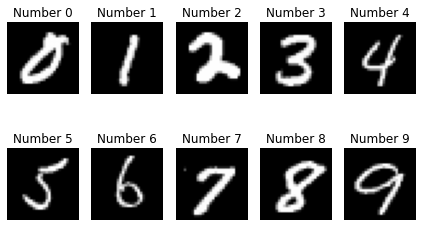

In [ ]:
X_image = restoreImg(x_train)	
Ydigits = decode(y_train)
plotExampleImg("Show image examples", X_image, Ydigits)

เอาไว้เทสโมเดลตั้งแต่ตัวอย่างที่ 4-9

In [ ]:
from sklearn import metrics

def test_model(model, X_testImage, x_test, y_test):
  	
  Y_testDigits = decode(y_test)  # convert binary to digits 0-9

  Y_predict = model.predict(x_test, verbose=0)
  Y_predictDigits 	= decode(Y_predict) # convert binary to digits 0-9
  print("++++++++++++++++++++++")
  print("Classification report")
  print(metrics.classification_report(Y_testDigits, Y_predictDigits))

  Y_prob = get_prob(Y_predict) 
  plotExampleImg("Show image examples", X_testImage, Y_testDigits, Y_prob)


# ตัวอย่างและการใช้งาน


## เตรียม Datasets สำหรับตัวอย่างที่ 1 - 3

In [ ]:
x_train, y_train, x_test, y_test = get_datasets('mnist')
x_train, x_test = preprocess_input(x_train, x_test)

## ตัวอย่างที่ 1

<h3>Nearest neighbors</h3>

เนื่องจากตัวอย่างข้อมูลเยอะ เลยรันนานหน่อย
<hr>


In [ ]:
train_nearest_neighbors(x_train, y_train, x_test, y_test)

progress 1 %
progress 2 %
progress 3 %
progress 4 %
progress 5 %
progress 6 %
progress 7 %
progress 8 %
progress 9 %
progress 10 %
progress 11 %
progress 12 %
progress 13 %
progress 14 %
progress 15 %
progress 16 %
progress 17 %
progress 18 %
progress 19 %
progress 20 %
progress 21 %
progress 22 %
progress 23 %
progress 24 %
progress 25 %
progress 26 %
progress 27 %
progress 28 %
progress 28 %
progress 30 %
progress 31 %
progress 32 %
progress 33 %
progress 34 %
progress 35 %
progress 36 %
progress 37 %
progress 38 %
progress 39 %
progress 40 %
progress 41 %
progress 42 %
progress 43 %
progress 44 %
progress 45 %
progress 46 %
progress 47 %
progress 48 %
progress 49 %
progress 50 %
progress 51 %
progress 52 %
progress 53 %
progress 54 %
progress 55 %
progress 56 %
progress 56 %
progress 57 %
progress 59 %
progress 60 %
progress 61 %
progress 62 %
progress 63 %
progress 64 %
progress 65 %
progress 66 %
progress 67 %
progress 68 %
progress 69 %
progress 70 %
progress 71 %
progress 72 %
p

## ตัวอย่างที่ 2

<h3>Support vector</h3>

เนื่องจากตัวอย่างข้อมูลเยอะ เลยรันนานหน่อย
<hr>

In [ ]:
import random

x_train = random.sample(x_train,10000)
y_train = random.sample(y_train,10000)
x_test = random.sample(x_test,10000)
y_test = random.sample(y_test,10000)

train_support_vector(x_train, y_train, x_test, y_test)	

TypeError: ignored

## ตัวอย่างที่ 3

<h3>Logistic regression (1 neural)</h3>


---



## เตรียม Datasets สำหรับตัวอย่างที่ 4 - 9

In [ ]:
x_train, y_train, x_test, y_test = get_datasets('mnist')
x_image = x_train
x_train, x_test = preprocess_input(x_train, x_test)
y_train, y_test = preprocess_label(y_train, y_test)

**ดูตัวอย่างภาพใน datasets**

In [ ]:
X_image = restoreImg(x_train)	
Ydigits = decode(y_train)
plotExampleImg("Show image examples", X_image, Ydigits)

## ตัวอย่างที่ 4

<h3> Neural network (Multilayer Perceptron: MLP)</h3>


---

In [ ]:
model = build_MLP(features)
model.summary()

#model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)
model.fit(x_train, y_train, 
          batch_size=32, epochs=101, 
          validation_data=(x_test, y_test),
          callbacks=[plot],
          verbose=0)

In [ ]:
import random
index = random.randint(0, 100)
Y_predict = model.predict(x_test, verbose=0)
print(y_test[index])
print(Y_predict[index])

In [ ]:
X_testImage = restoreImg(x_test)
test_model(model, X_testImage, x_test, y_test)

## ตัวอย่างที่ 5

<h3>  Convolutional Neural Networks (CNN) with Conv2D </h3>


---


In [ ]:
# reshape to Theano: (batchsize, chanel, row, colum) or Tensorflow: (batchsize, row, column, chanel)
XtrainCNN = reshapeCNN2D_Input(x_train)
XtestCNN = reshapeCNN2D_Input(x_test)
image_shape = XtrainCNN.shape[1:]	# select (chanel, row, column) or (row, column, chanel)

model = build_CNN_2D(image_shape)
model.summary()

#model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)
model.fit(XtrainCNN, y_train, 
          batch_size=32, epochs=61, 
          validation_data=(XtestCNN, y_test),
          callbacks=[plot],
          verbose=0)

In [ ]:
X_testImage = restoreImg(x_test)
test_model(model, X_testImage, XtestCNN, y_test)

## ตัวอย่างที่ 6

<h3>Convolutional Neural Networks (CNN) with Convolution1D</h3
 

---


In [ ]:
# reshape to Theano: (batchsize, chanel, row, colum) or Tensorflow: (batchsize, row, column, chanel)
XtrainCNN = reshapeCNN1D_Input(x_train)
XtestCNN = reshapeCNN1D_Input(x_test)
image_shape = XtrainCNN.shape[1:]	# select (chanel, row, column) or (row, column, chanel)

model = build_CNN_1D(image_shape)
model.summary()

#model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)
model.fit(XtrainCNN, y_train, 
          batch_size=32, epochs=101, 
          validation_data=(XtestCNN, y_test),
          callbacks=[plot],
          verbose=0)

In [ ]:
X_testImage = restoreImg(x_test)
test_model(model, X_testImage, XtestCNN, y_test)

## ตัวอย่างที่ 7

<h3> Recurrent Neural Networks (RNN) </h3>



---


In [ ]:
print(np.shape(x_train))
# reshape to sequences for Recurrent Neural Networks
XtrainSeq = getSequenceInput(x_train)
XtestSeq = getSequenceInput(x_test)
image_shape = XtrainSeq.shape[1:]	# select (row, column)

model = build_RNN(image_shape)  
model.summary()

#model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)
model.fit(XtrainSeq, y_train, 
          batch_size=32, epochs=31, 
          validation_data=(XtestSeq, y_test),
          callbacks=[plot],
          verbose=0)

In [ ]:
X_testImage = restoreImg(x_test)
test_model(model, X_testImage, XtestSeq, y_test)

## ตัวอย่างที่ 8

<h3>Long short-term memory (LSTM)</h3>



---


In [ ]:
print(np.shape(x_train))
# reshape to sequences for Recurrent Neural Networks
XtrainSeq = getSequenceInput(x_train)
XtestSeq = getSequenceInput(x_test)
image_shape = XtrainSeq.shape[1:]	# select (row, column)

model = build_LSTM(image_shape)  
model.summary()

#model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)
model.fit(XtrainSeq, y_train, 
          batch_size=32, epochs=11, 
          validation_data=(XtestSeq, y_test),
          callbacks=[plot],
          verbose=0)

In [ ]:
X_testImage = restoreImg(x_test)
test_model(model, X_testImage, XtestSeq, y_test)

## ตัวอย่างที่ 9

<h3>Gated Recurrent Unit (GRU)</h3>



---


In [ ]:
print(np.shape(x_train))
# reshape to sequences for Recurrent Neural Networks
XtrainSeq = getSequenceInput(x_train)
XtestSeq = getSequenceInput(x_test)
image_shape = XtrainSeq.shape[1:]	# select (row, column)

model = build_LSTM(image_shape)  
model.summary()

#model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)
model.fit(XtrainSeq, y_train, 
          batch_size=32, epochs=11, 
          validation_data=(XtestSeq, y_test),
          callbacks=[plot],
          verbose=0)

In [ ]:
X_testImage = restoreImg(x_test)
test_model(model, X_testImage, XtestSeq, y_test)

In [ ]:
#accuracy = model.evaluate(x=x_test, y=y_test, batch_size=32)
#print("Accuracy: ",accuracy[1])

#model.predict(x, batch_size=None, verbose=0, steps=None, callbacks=None)


# ฝากติดตาม

<img height="20px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2017/06/logo_facebook2.png" align="left" hspace="10px" vspace="0px">  https://www.facebook.com/programmerthai/

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/03/youtube.png" align="left" hspace="10px" vspace="3px">  https://www.youtube.com/channel/UCvhCKtG5cRE6K5--RJPql_w

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/09/github-2.jpg" align="left" hspace="10px" vspace="3px">https://github.com/adminho/machine-learning

# ฝากประชาสัมพันธ์

In [ ]:
#@title หนังสือ AI (ปัญญาประดิษฐ์) ไม่ยาก เรียนรู้ได้ด้วยเลขม. ปลาย ราคา 295 บาท
%%HTML
<iframe src="https://www.facebook.com/plugins/post.php?href=https%3A%2F%2Fwww.facebook.com%2Fprogrammerthai%2Fphotos%2Fa.2410667485889755%2F2555677101388792%2F%3Ftype%3D3&width=500" width="500" height="588" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowTransparency="true" allow="encrypted-media"></iframe>